# 📊 Kəşfiyyat Data Analizi (EDA)
# Exploratory Data Analysis

Bu notebook-da biz:
1. **Məlumatları yükləyirik və araşdırırıq**
2. **Hədəf dəyişəni (Nağd pul kredit satışı) təhlil edirik**
3. **Xüsusiyyətlər arasında əlaqələri öyrənirik**
4. **Mövsümilik və trend analizi aparırıq**
5. **Statistik testlər həyata keçiririk**

---

## 1️⃣ Kitabxanaların İdxalı

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Görünüş parametrləri
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Qrafik üslubu
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Kitabxanalar uğurla yükləndi")

✅ Kitabxanalar uğurla yükləndi


## 2️⃣ Məlumatların Yüklənməsi

In [2]:
# Məlumat faylını yüklə
DATA_PATH = Path('../notebooks/data/ml_ready_data.csv')

if not DATA_PATH.exists():
    raise FileNotFoundError(f"❌ Məlumat faylı tapılmadı: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)

print(f"✅ Məlumatlar yükləndi")
print(f"📊 Forma: {df.shape}")
print(f"📅 Dövr: {df['Year'].min()}-Q{df['Quarter'].min()} - {df['Year'].max()}-Q{df['Quarter'].max()}")

# İlk məlumatlar
df.head()

✅ Məlumatlar yükləndi
📊 Forma: (23, 44)
📅 Dövr: 2020-Q1 - 2025-Q4


,Rüblər,GDP,Dövlət_Gəlirləri,Dövlət_Xərcləri,Əhalinin_nominal_gəlirləri,Əhalinin_banklardakı_əmanətləri,Orta_aylıq_əməkhaqqı,Xarici_ticarət_dövriyyəsi,İxrac,İdxal,Pul_bazası,Oil_Price,Tikinti-quraşdırma_işlərinə_sərf_edilmiş_vəsait,İstehlak_xərcləri,Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar,Mənzil_qiymətləri,Uçot_faiz_dərəcəsi,Kumulyativ_satish,Nağd_pul_kredit_satışı,Portfel,NPLs,ROA,ROE,Net_Interest_Margin,Efficiency_Ratio,Loan-to-Deposit_Ratio,Müştəri_sayı,Year,Quarter,Time_Index,Quarter_Sin,Quarter_Cos,Lag_1,Lag_2,Lag_3,Lag_4,Rolling_Mean_2,Rolling_Mean_3,Rolling_Mean_4,Rolling_Std_2,Rolling_Std_3,Rolling_Std_4,Diff_1,Diff_4
0,2020 I,17928100.00,7810900.00,5254800.00,13442500.00,8251700.00,0.74,11382010.00,6899110.00,4482900.00,10066900.00,0.09,1963955.70,0.32,288706.60,1.22,0.07,46642841.49,46642841.49,359233.76,25.85,0.00,0.03,0.02,0.77,1.31,25304.00,2020,1,0,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020 II,16450600.00,4211800.00,6476000.00,13935300.00,7706400.00,0.72,8593330.00,4594080.00,3999250.00,11251800.00,0.05,2030799.30,0.29,337427.20,1.22,0.07,62352225.96,15709384.47,349405.74,37.21,0.01,0.08,0.03,0.71,1.32,16316.00,2020,2,1,0.00,-1.00,46642841.49,NaN,NaN,NaN,31176112.98,NaN,NaN,21873257.22,NaN,NaN,-30933457.02,NaN
2,2020 III,17965600.00,5941800.00,6911300.00,14231200.00,7834300.00,0.71,10336170.00,5518370.00,4817800.00,12230100.00,0.07,2206427.10,0.29,316308.80,1.22,0.07,113609773.73,51257547.77,366496.28,37.87,0.02,0.12,0.03,0.71,1.35,32598.00,2020,3,2,-1.00,-0.00,15709384.47,46642841.49,NaN,NaN,33483466.12,37869924.58,NaN,25136347.33,19329796.48,NaN,35548163.30,NaN
3,2020 IV,20233800.00,6708600.00,7775000.00,14117100.00,8177900.00,0.71,10830360.00,5888120.00,4942240.00,13564200.00,0.08,3152893.00,0.30,424897.40,1.22,0.06,140001771.45,26391997.72,337946.34,26.70,0.03,0.17,0.03,0.74,1.24,28564.00,2020,4,3,-0.00,1.00,51257547.77,15709384.47,46642841.49,NaN,38824772.74,31119643.32,35000442.86,17582599.06,18239543.67,16793740.57,-24865550.05,NaN
4,2021 I,19181900.00,5736400.00,5523700.00,13455900.00,8147500.00,0.71,11962560.00,7660710.00,4301850.00,13315000.00,0.10,1490116.70,0.31,205773.40,1.25,0.06,53293774.11,53293774.11,355393.14,39.61,0.01,0.05,0.03,0.71,1.25,39842.00,2021,1,4,1.00,0.00,26391997.72,51257547.77,15709384.47,46642841.49,39842885.91,43647773.20,36663176.02,19022428.51,14978581.21,18566376.09,26901776.39,6650932.62


## 3️⃣ Ümumi Baxış

In [3]:
print("="*80)
print("MƏLUMAT TÖPLUsU HAQQINDA ÜMUMI MƏLUMAT")
print("="*80)

print(f"\n📊 Sətir sayı: {df.shape[0]}")
print(f"📊 Sütun sayı: {df.shape[1]}")

# Məlumat növləri
print("\n📋 Məlumat növlərinə görə bölgü:")
print(f"  Rəqəmsal: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"  Mətn: {len(df.select_dtypes(include=['object']).columns)}")

# Boş dəyərlər
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]
if len(missing_cols) > 0:
    print(f"\n⚠️ Boş dəyərlər olan sütunlar: {len(missing_cols)}")
else:
    print("\n✅ Boş dəyər yoxdur")

MƏLUMAT TÖPLUsU HAQQINDA ÜMUMI MƏLUMAT

📊 Sətir sayı: 23
📊 Sütun sayı: 44

📋 Məlumat növlərinə görə bölgü:
  Rəqəmsal: 43
  Mətn: 1

⚠️ Boş dəyərlər olan sütunlar: 38


## 4️⃣ Hədəf Dəyişənin Təhlili

### 🎯 Nağd Pul Kredit Satışı (Target Variable)

Bu bizim **hədəf dəyişənimizdir** - proqnozlaşdırmaq istədiyimiz göstərici.

In [4]:
# Hədəf dəyişəni
target = 'Nağd_pul_kredit_satışı'

# Boş olmayan məlumatlar
df_valid = df[df[target].notna()].copy()
target_data = df_valid[target]

print("="*80)
print("HƏDƏF DƏYİŞƏN: NAĞD PUL KREDİT SATIŞI")
print("="*80)

print(f"\n📊 Statistika:")
print(f"  Etibarlı məlumat sayı: {len(target_data)}")
print(f"  Ortalama: {target_data.mean():,.2f} AZN")
print(f"  Median: {target_data.median():,.2f} AZN")
print(f"  Standart sapma: {target_data.std():,.2f} AZN")
print(f"  Minimum: {target_data.min():,.2f} AZN")
print(f"  Maksimum: {target_data.max():,.2f} AZN")
print(f"  Variasiya əmsalı: {(target_data.std() / target_data.mean()) * 100:.2f}%")

# Percentiles
print(f"\n📊 Persentillər:")
for p in [25, 50, 75, 90, 95]:
    val = target_data.quantile(p/100)
    print(f"  {p}%: {val:,.2f} AZN")

HƏDƏF DƏYİŞƏN: NAĞD PUL KREDİT SATIŞI

📊 Statistika:
  Etibarlı məlumat sayı: 22
  Ortalama: 84,884,915.56 AZN
  Median: 93,016,444.91 AZN
  Standart sapma: 31,290,413.62 AZN
  Minimum: 15,709,384.47 AZN
  Maksimum: 126,285,413.80 AZN
  Variasiya əmsalı: 36.86%

📊 Persentillər:
  25%: 71,730,595.59 AZN
  50%: 93,016,444.91 AZN
  75%: 107,420,045.04 AZN
  90%: 122,377,807.11 AZN
  95%: 125,156,922.57 AZN


### 📈 Statistik Terminlər İzahı:

- **Ortalama (Mean)**: Bütün dəyərlərin cəminin sayına bölünməsi
- **Median**: Məlumatları sıraladıqda ortada olan dəyər
- **Standart Sapma (Std Dev)**: Məlumatların ortalamadan nə qədər uzaqlaşdığını göstərir
- **Variasiya Əmsalı**: Standart sapmanın ortalamaya nisbəti (dəyişkənliyi ölçür)
- **Persentil**: Məlumatların müəyyən faizinin altında qalan dəyər

### 📊 Vizualizasiya 1: Hədəf Dəyişənin Bölgüsü

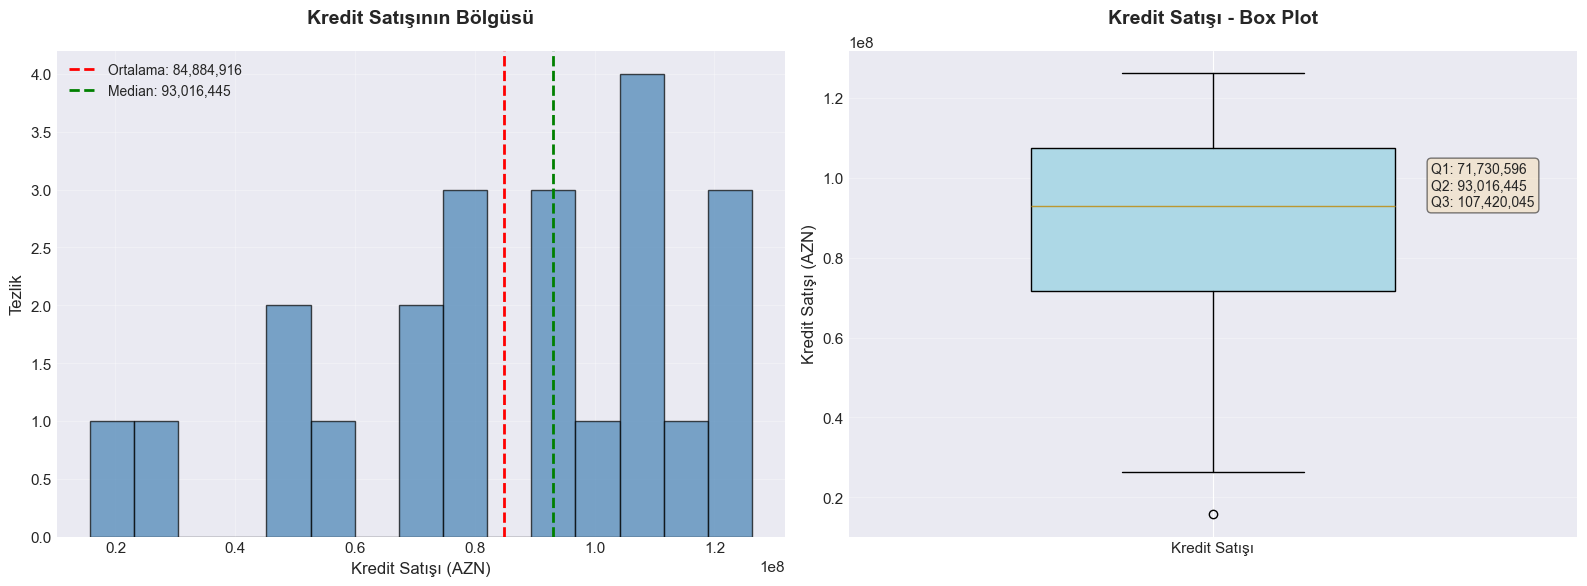


📊 Box Plot İzahı:
  • Qutunun aşağı kənarı: 25-ci persentil (Q1)
  • Qutunun içindəki xətt: Median (Q2)
  • Qutunun yuxarı kənarı: 75-ci persentil (Q3)
  • Bığlar: Minimum və maksimum dəyərlər


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
ax1 = axes[0]
ax1.hist(target_data, bins=15, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(target_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Ortalama: {target_data.mean():,.0f}')
ax1.axvline(target_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {target_data.median():,.0f}')
ax1.set_title('Kredit Satışının Bölgüsü', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Kredit Satışı (AZN)', fontsize=12)
ax1.set_ylabel('Tezlik', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Box plot
ax2 = axes[1]
bp = ax2.boxplot([target_data], vert=True, patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][0].set_edgecolor('black')
ax2.set_title('Kredit Satışı - Box Plot', fontsize=14, fontweight='bold', pad=20)
ax2.set_ylabel('Kredit Satışı (AZN)', fontsize=12)
ax2.set_xticklabels(['Kredit Satışı'])
ax2.grid(True, alpha=0.3, axis='y')

# Statistika məlumatlarını əlavə et
stats_text = f"Q1: {target_data.quantile(0.25):,.0f}\nQ2: {target_data.median():,.0f}\nQ3: {target_data.quantile(0.75):,.0f}"
ax2.text(1.3, target_data.median(), stats_text, fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n📊 Box Plot İzahı:")
print("  • Qutunun aşağı kənarı: 25-ci persentil (Q1)")
print("  • Qutunun içindəki xətt: Median (Q2)")
print("  • Qutunun yuxarı kənarı: 75-ci persentil (Q3)")
print("  • Bığlar: Minimum və maksimum dəyərlər")

### 📊 Vizualizasiya 2: Zaman Seriyası Analizi

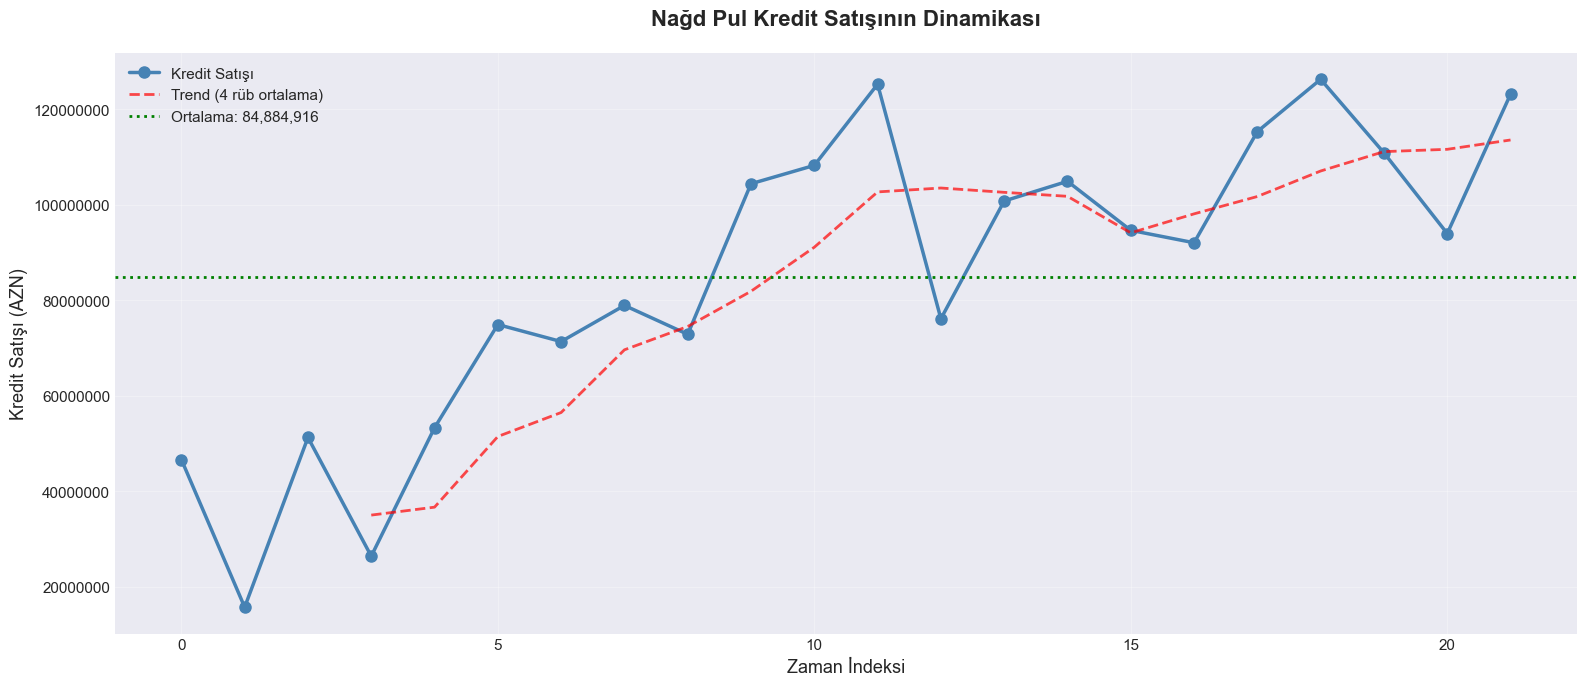


📈 Trend Analizi:
  İlk yarı ortalama: 64,001,359.46 AZN
  İkinci yarı ortalama: 105,768,471.65 AZN
  Dəyişiklik: +65.26%


In [6]:
fig, ax = plt.subplots(figsize=(16, 7))

# Əsas xətt
ax.plot(df_valid['Time_Index'], df_valid[target], 
        marker='o', linewidth=2.5, markersize=8, color='steelblue', label='Kredit Satışı')

# Trend xətti (hərəkətli ortalama)
ma_4 = df_valid[target].rolling(window=4).mean()
ax.plot(df_valid['Time_Index'], ma_4, 
        linestyle='--', linewidth=2, color='red', alpha=0.7, label='Trend (4 rüb ortalama)')

# Ortalama xətti
ax.axhline(y=target_data.mean(), color='green', linestyle=':', linewidth=2, label=f'Ortalama: {target_data.mean():,.0f}')

ax.set_title('Nağd Pul Kredit Satışının Dinamikası', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Zaman İndeksi', fontsize=13)
ax.set_ylabel('Kredit Satışı (AZN)', fontsize=13)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)

# Y oxunu formatla
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n📈 Trend Analizi:")
first_half_avg = target_data.iloc[:len(target_data)//2].mean()
second_half_avg = target_data.iloc[len(target_data)//2:].mean()
change = ((second_half_avg - first_half_avg) / first_half_avg) * 100
print(f"  İlk yarı ortalama: {first_half_avg:,.2f} AZN")
print(f"  İkinci yarı ortalama: {second_half_avg:,.2f} AZN")
print(f"  Dəyişiklik: {change:+.2f}%")

### 📊 Vizualizasiya 3: Mövsümilik Analizi (Rüblər üzrə)

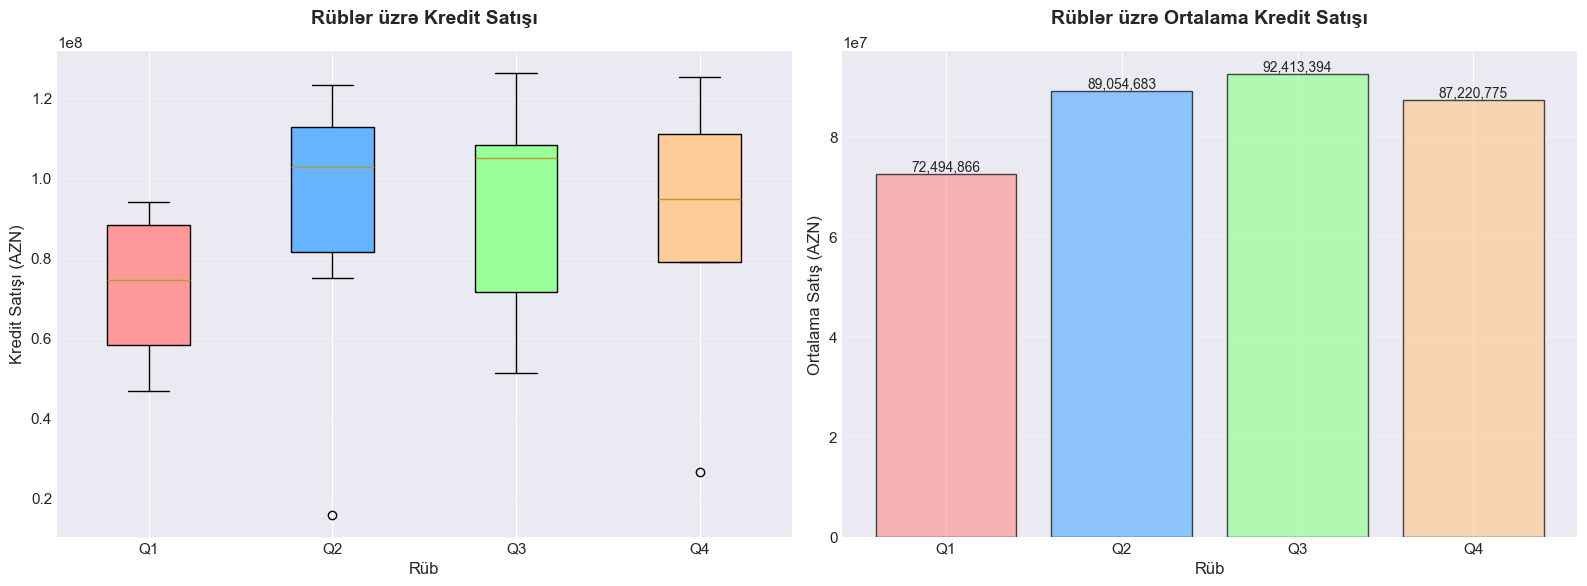


📊 Rüblər üzrə Statistika:

Q1:
  Ortalama: 72,494,866.21 AZN
  Median: 74,499,845.91 AZN
  Std: 19,465,435.63 AZN

Q2:
  Ortalama: 89,054,683.22 AZN
  Median: 102,602,676.27 AZN
  Std: 39,514,650.60 AZN

Q3:
  Ortalama: 92,413,394.35 AZN
  Median: 104,918,587.42 AZN
  Std: 30,380,991.91 AZN

Q4:
  Ortalama: 87,220,774.78 AZN
  Median: 94,647,027.24 AZN
  Std: 38,181,291.71 AZN



In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot - Rüblər üzrə
ax1 = axes[0]
quarters_data = [df_valid[df_valid['Quarter']==q][target].values for q in [1, 2, 3, 4]]
bp = ax1.boxplot(quarters_data, labels=['Q1', 'Q2', 'Q3', 'Q4'], patch_artist=True)

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

ax1.set_title('Rüblər üzrə Kredit Satışı', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Rüb', fontsize=12)
ax1.set_ylabel('Kredit Satışı (AZN)', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Bar plot - Ortalama satış
ax2 = axes[1]
quarterly_avg = df_valid.groupby('Quarter')[target].mean()
bars = ax2.bar([f'Q{i}' for i in quarterly_avg.index], quarterly_avg.values, 
               color=colors, edgecolor='black', alpha=0.7)

# Dəyərləri göstər
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,.0f}',
            ha='center', va='bottom', fontsize=10)

ax2.set_title('Rüblər üzrə Ortalama Kredit Satışı', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Rüb', fontsize=12)
ax2.set_ylabel('Ortalama Satış (AZN)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistika
print("\n📊 Rüblər üzrə Statistika:\n")
for q in [1, 2, 3, 4]:
    q_data = df_valid[df_valid['Quarter']==q][target]
    print(f"Q{q}:")
    print(f"  Ortalama: {q_data.mean():,.2f} AZN")
    print(f"  Median: {q_data.median():,.2f} AZN")
    print(f"  Std: {q_data.std():,.2f} AZN")
    print()

### 📊 Vizualizasiya 4: İllər üzrə Müqayisə

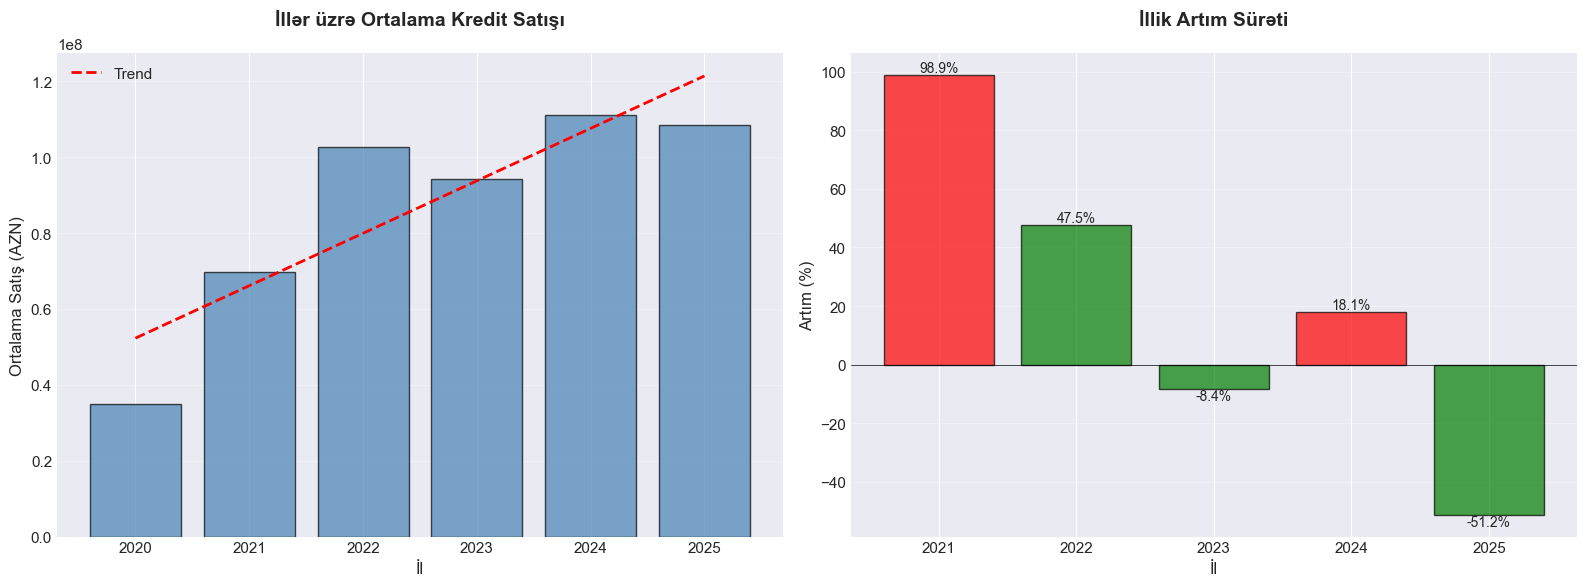


📊 İllik Artım Statistikası:

Ortalama illik artım: 21.00%
Ən yüksək artım: 98.91% (2021)
Ən aşağı artım: -51.16% (2025)


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# İllər üzrə ortalama
ax1 = axes[0]
yearly_avg = df_valid.groupby('Year')[target].mean()
bars = ax1.bar(yearly_avg.index, yearly_avg.values, color='steelblue', edgecolor='black', alpha=0.7)

# Trend xətti
z = np.polyfit(yearly_avg.index, yearly_avg.values, 1)
p = np.poly1d(z)
ax1.plot(yearly_avg.index, p(yearly_avg.index), "r--", linewidth=2, label='Trend')

ax1.set_title('İllər üzrə Ortalama Kredit Satışı', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('İl', fontsize=12)
ax1.set_ylabel('Ortalama Satış (AZN)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# İllik artım
ax2 = axes[1]
yearly_total = df_valid.groupby('Year')[target].sum()
growth = yearly_total.pct_change() * 100
colors_growth = ['green' if x > 0 else 'red' for x in growth]
bars = ax2.bar(growth.index[1:], growth.values[1:], color=colors_growth, edgecolor='black', alpha=0.7)

ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.set_title('İllik Artım Sürəti', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('İl', fontsize=12)
ax2.set_ylabel('Artım (%)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Dəyərləri göstər
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 İllik Artım Statistikası:\n")
print(f"Ortalama illik artım: {growth.mean():.2f}%")
print(f"Ən yüksək artım: {growth.max():.2f}% ({growth.idxmax()})")
print(f"Ən aşağı artım: {growth.min():.2f}% ({growth.idxmin()})")

## 5️⃣ Korrelyasiya Analizi

### 📊 Korrelyasiya nədir?

Korrelyasiya iki dəyişən arasındakı əlaqənin gücünü və istiqamətini ölçür:
- **+1**: Mükəmməl müsbət əlaqə (biri artanda digəri də artar)
- **0**: Əlaqə yoxdur
- **-1**: Mükəmməl mənfi əlaqə (biri artanda digəri azalar)

In [9]:
# Əsas iqtisadi göstəricilər
economic_features = [
    'Nağd_pul_kredit_satışı',
    'GDP',
    'Əhalinin_banklardakı_əmanətləri',
    'Müştəri_sayı',
    'Portfel',
    'Oil_Price',
    'Uçot_faiz_dərəcəsi',
    'ROA',
    'NPLs'
]

# Mövcud sütunları seç
available_features = [f for f in economic_features if f in df.columns]

# Korrelyasiya matrisi
corr_matrix = df[available_features].corr()

# Hədəf dəyişənlə korrelyasiya
target_corr = corr_matrix[target].sort_values(ascending=False)

print("="*80)
print(f"HƏDƏf DƏYİŞƏNLƏ ({target}) KORRELYASIYA")
print("="*80)
print("\n📊 Ən güclü müsbət əlaqələr:\n")
for feat, corr in target_corr.head(6).items():
    if feat != target:
        print(f"  {feat:40s}: {corr:+.4f}")

print("\n📊 Ən güclü mənfi əlaqələr:\n")
for feat, corr in target_corr.tail(3).items():
    if feat != target:
        print(f"  {feat:40s}: {corr:+.4f}")

HƏDƏf DƏYİŞƏNLƏ (Nağd_pul_kredit_satışı) KORRELYASIYA

📊 Ən güclü müsbət əlaqələr:

  GDP                                     : +0.9020
  Əhalinin_banklardakı_əmanətləri         : +0.8218
  Portfel                                 : +0.8145
  Oil_Price                               : +0.7366
  Müştəri_sayı                            : +0.6660

📊 Ən güclü mənfi əlaqələr:

  Müştəri_sayı                            : +0.6660
  Uçot_faiz_dərəcəsi                      : +0.4882
  NPLs                                    : -0.5818


### 📊 Vizualizasiya 5: Korrelyasiya İstilik Xəritəsi (Heatmap)

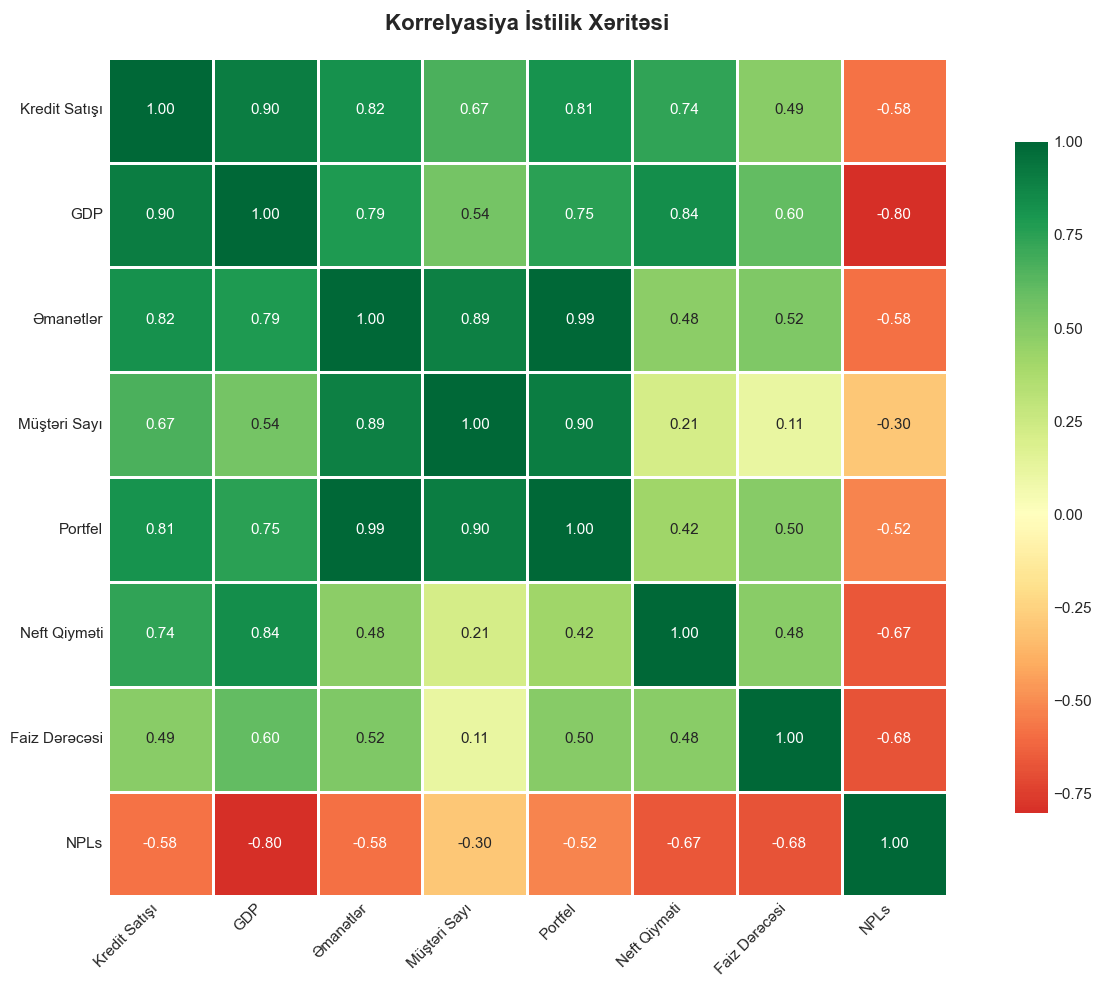


📊 İstilik Xəritəsi İzahı:
  🟢 Yaşıl: Müsbət korrelyasiya (birlikdə artır)
  🔴 Qırmızı: Mənfi korrelyasiya (biri artar, digəri azalar)
  🟡 Sarı: Zəif və ya əlaqə yoxdur


In [10]:
# İstilik xəritəsi
fig, ax = plt.subplots(figsize=(14, 10))

# Azca adları
feature_labels = {
    'Nağd_pul_kredit_satışı': 'Kredit Satışı',
    'GDP': 'GDP',
    'Əhalinin_banklardakı_əmanətləri': 'Əmanətlər',
    'Müştəri_sayı': 'Müştəri Sayı',
    'Portfel': 'Portfel',
    'Oil_Price': 'Neft Qiyməti',
    'Uçot_faiz_dərəcəsi': 'Faiz Dərəcəsi',
    'ROA': 'ROA',
    'NPLs': 'NPLs'
}

labels = [feature_labels.get(f, f) for f in available_features]

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_title('Korrelyasiya İstilik Xəritəsi', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n📊 İstilik Xəritəsi İzahı:")
print("  🟢 Yaşıl: Müsbət korrelyasiya (birlikdə artır)")
print("  🔴 Qırmızı: Mənfi korrelyasiya (biri artar, digəri azalar)")
print("  🟡 Sarı: Zəif və ya əlaqə yoxdur")

### 📊 Vizualizasiya 6: Ən Güclü Əlaqələr (Scatter Plots)

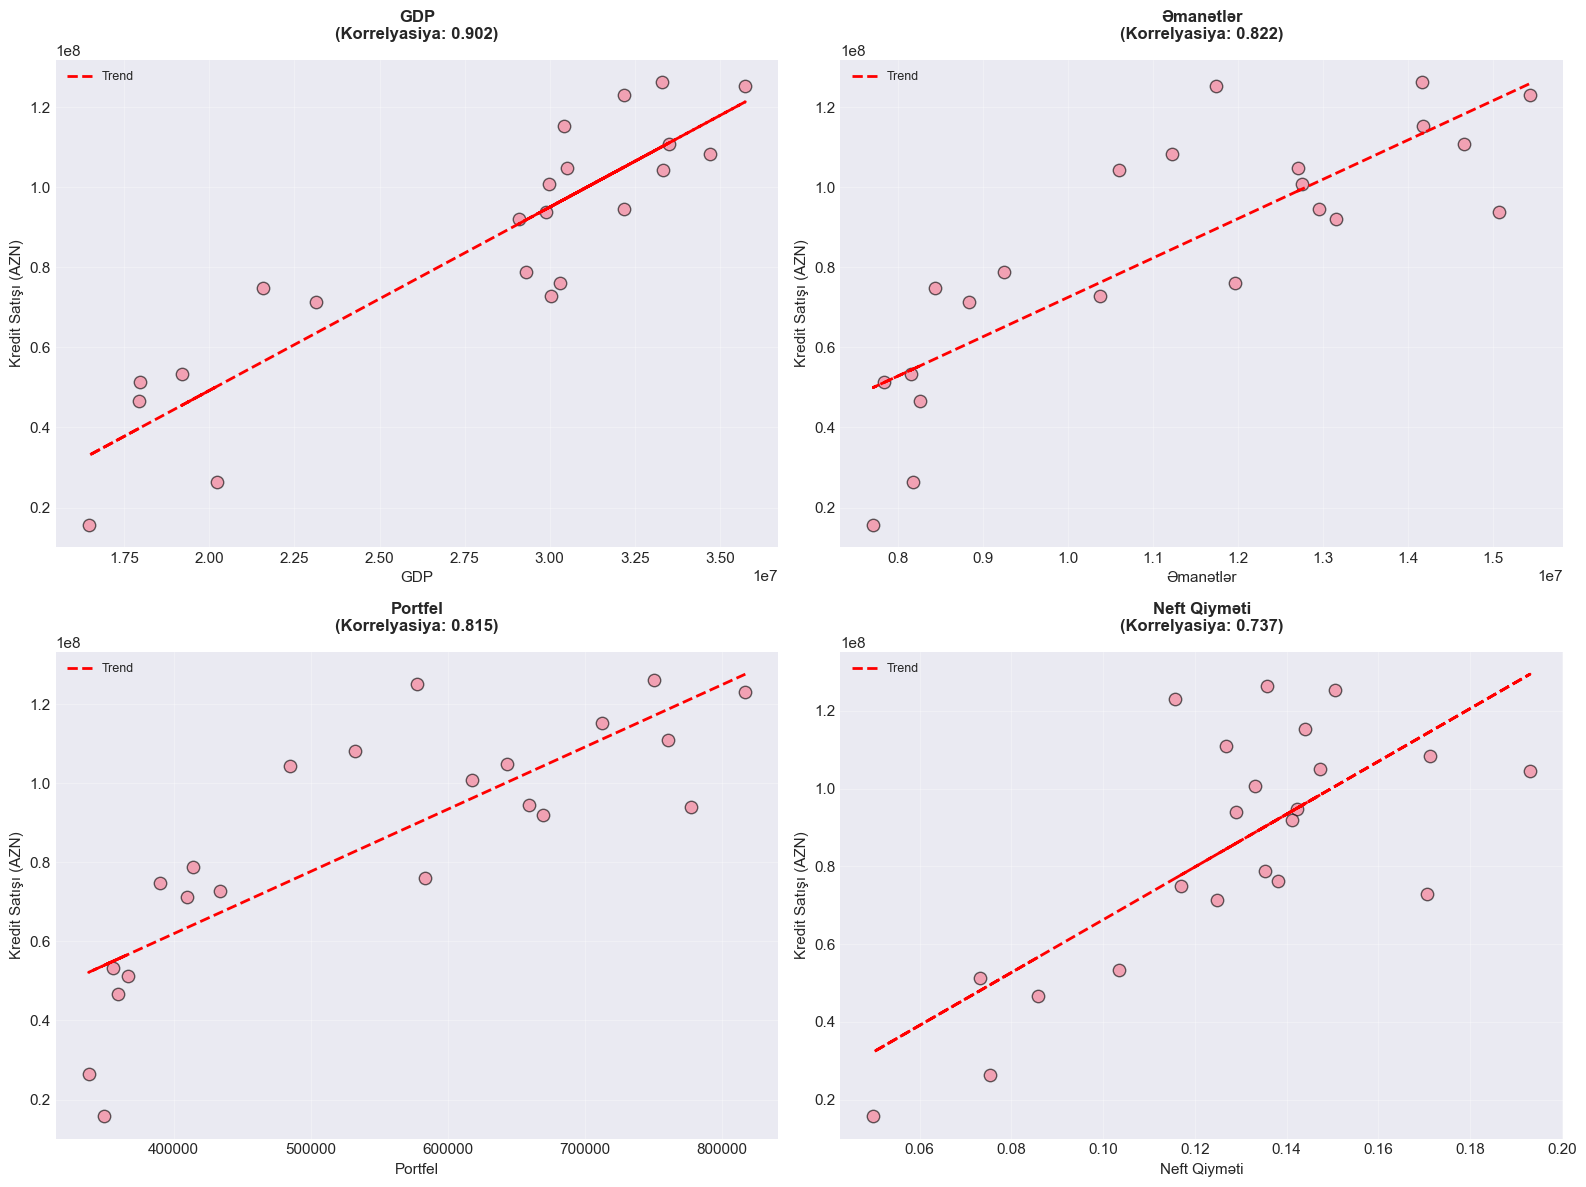


📊 Scatter Plot İzahı:
  • Hər nöqtə bir rübü təmsil edir
  • Qırmızı xətt trend istiqamətini göstərir
  • Nöqtələr xəttə yaxın olduqca əlaqə güclüdür


In [11]:
# Ən yüksək korrelyasiyalı 4 xüsusiyyət (target istisna olmaqla)
top_features = target_corr[target_corr.index != target].head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    
    # Scatter plot
    df_plot = df[[feature, target]].dropna()
    ax.scatter(df_plot[feature], df_plot[target], alpha=0.6, s=80, edgecolors='black')
    
    # Trend xətti
    z = np.polyfit(df_plot[feature], df_plot[target], 1)
    p = np.poly1d(z)
    ax.plot(df_plot[feature], p(df_plot[feature]), "r--", linewidth=2, label='Trend')
    
    # Korrelyasiya
    corr_val = df_plot[feature].corr(df_plot[target])
    
    ax.set_title(f'{feature_labels.get(feature, feature)}\n(Korrelyasiya: {corr_val:.3f})', 
                fontsize=12, fontweight='bold', pad=15)
    ax.set_xlabel(feature_labels.get(feature, feature), fontsize=11)
    ax.set_ylabel('Kredit Satışı (AZN)', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Scatter Plot İzahı:")
print("  • Hər nöqtə bir rübü təmsil edir")
print("  • Qırmızı xətt trend istiqamətini göstərir")
print("  • Nöqtələr xəttə yaxın olduqca əlaqə güclüdür")

## 6️⃣ Lag Xüsusiyyətləri Analizi

### 📊 Lag nədir?

Lag - keçmiş dövrlərdən gələn dəyərlər. Məsələn, Lag_1 əvvəlki rübün dəyəridir.

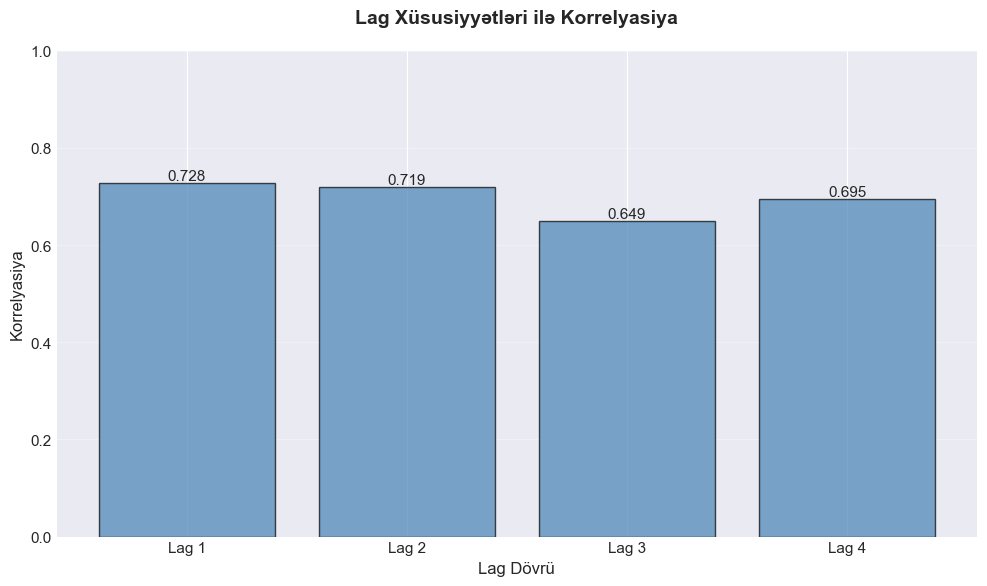


📊 Lag Analizi:
  Lag_1: 0.7282
  Lag_2: 0.7194
  Lag_3: 0.6495
  Lag_4: 0.6953

💡 İzah: Yüksək korrelyasiya keçmiş dəyərlərin gələcək proqnoz üçün faydalı olduğunu göstərir


In [12]:
# Lag xüsusiyyətləri
lag_features = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4']
available_lags = [f for f in lag_features if f in df.columns]

if available_lags:
    # Korrelyasiya
    lag_corr = df[[target] + available_lags].corr()[target].drop(target)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bars = ax.bar(range(len(lag_corr)), lag_corr.values, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_xticks(range(len(lag_corr)))
    ax.set_xticklabels([f'Lag {i+1}' for i in range(len(lag_corr))])
    
    # Dəyərləri göstər
    for i, (bar, val) in enumerate(zip(bars, lag_corr.values)):
        ax.text(i, val, f'{val:.3f}', ha='center', va='bottom', fontsize=11)
    
    ax.set_title('Lag Xüsusiyyətləri ilə Korrelyasiya', fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Lag Dövrü', fontsize=12)
    ax.set_ylabel('Korrelyasiya', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Lag Analizi:")
    for lag, corr in lag_corr.items():
        print(f"  {lag}: {corr:.4f}")
    
    print("\n💡 İzah: Yüksək korrelyasiya keçmiş dəyərlərin gələcək proqnoz üçün faydalı olduğunu göstərir")

## 7️⃣ Normallik Testi

### 📊 Normallik nədir?

Normal bölgü (Gauss bölgüsü) - bir çox statistik testlər üçün vacib olan bell əyrisinin forması.

In [13]:
from scipy.stats import shapiro, normaltest

# Normallik testləri
shapiro_stat, shapiro_p = shapiro(target_data)

print("="*80)
print("NORMALLİK TESTİ")
print("="*80)

print(f"\n📊 Shapiro-Wilk Testi:")
print(f"  Statistika: {shapiro_stat:.4f}")
print(f"  p-dəyər: {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("  ✅ Məlumatlar normal bölgüdə ola bilər (p > 0.05)")
else:
    print("  ⚠️ Məlumatlar normal bölgüdə deyil (p < 0.05)")

# Skewness və Kurtosis
skewness = target_data.skew()
kurtosis = target_data.kurtosis()

print(f"\n📊 Əlavə Göstəricilər:")
print(f"  Skewness (Əyrilik): {skewness:.4f}")
if abs(skewness) < 0.5:
    print("    → Simmetrik bölgü")
elif skewness > 0:
    print("    → Sağa əyilmə (çox yüksək dəyərlər var)")
else:
    print("    → Sola əyilmə (çox aşağı dəyərlər var)")

print(f"\n  Kurtosis (Ləçəklik): {kurtosis:.4f}")
if abs(kurtosis) < 0.5:
    print("    → Normal ləçəklik")
elif kurtosis > 0:
    print("    → Yüksək ləçəklik (çox ekstremal dəyərlər)")
else:
    print("    → Aşağı ləçəklik (az ekstremal dəyərlər)")

NORMALLİK TESTİ

📊 Shapiro-Wilk Testi:
  Statistika: 0.9418
  p-dəyər: 0.2158
  ✅ Məlumatlar normal bölgüdə ola bilər (p > 0.05)

📊 Əlavə Göstəricilər:
  Skewness (Əyrilik): -0.6663
    → Sola əyilmə (çox aşağı dəyərlər var)

  Kurtosis (Ləçəklik): -0.2513
    → Normal ləçəklik


### 📊 Vizualizasiya 7: Q-Q Plot (Normallik Yoxlaması)

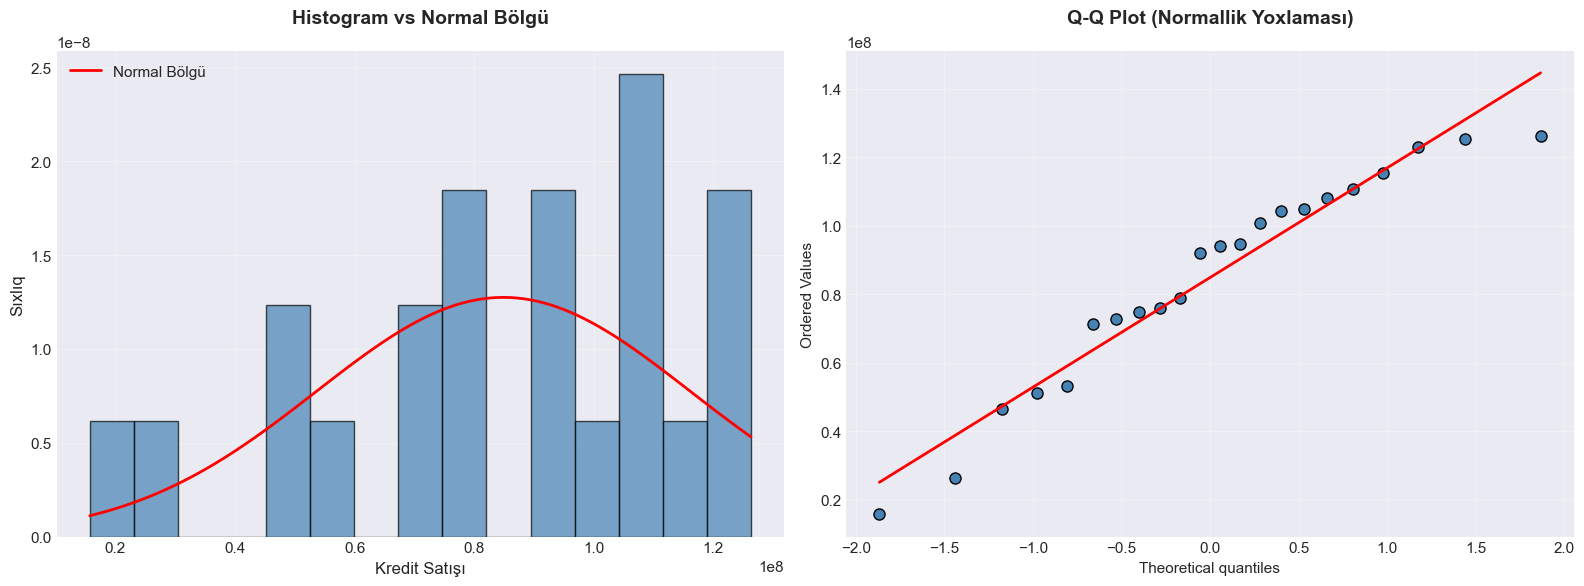


📊 Q-Q Plot İzahı:
  • Nöqtələr qırmızı xətt boyunca düzülürsə → Normal bölgü
  • Nöqtələr xəttdən uzaqlaşırsa → Normal deyil


In [14]:
from scipy.stats import probplot

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram ilə normal əyri
ax1 = axes[0]
ax1.hist(target_data, bins=15, density=True, alpha=0.7, color='steelblue', edgecolor='black')

# Normal bölgü əyrisi
mu, sigma = target_data.mean(), target_data.std()
x = np.linspace(target_data.min(), target_data.max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Bölgü')

ax1.set_title('Histogram vs Normal Bölgü', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Kredit Satışı', fontsize=12)
ax1.set_ylabel('Sıxlıq', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Q-Q Plot
ax2 = axes[1]
probplot(target_data, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot (Normallik Yoxlaması)', fontsize=14, fontweight='bold', pad=20)
ax2.get_lines()[0].set_markerfacecolor('steelblue')
ax2.get_lines()[0].set_markeredgecolor('black')
ax2.get_lines()[0].set_markersize(8)
ax2.get_lines()[1].set_color('red')
ax2.get_lines()[1].set_linewidth(2)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Q-Q Plot İzahı:")
print("  • Nöqtələr qırmızı xətt boyunca düzülürsə → Normal bölgü")
print("  • Nöqtələr xəttdən uzaqlaşırsa → Normal deyil")

## 8️⃣ Outlier (Kənar Dəyər) Analizi

### 📊 Outlier nədir?

Outlier - digər məlumatlardan əhəmiyyətli dərəcədə fərqlənən dəyərlər.

In [15]:
# IQR metodu
Q1 = target_data.quantile(0.25)
Q3 = target_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = target_data[(target_data < lower_bound) | (target_data > upper_bound)]

print("="*80)
print("OUTLIER ANALİZİ (IQR Metodu)")
print("="*80)

print(f"\n📊 IQR Parametrləri:")
print(f"  Q1 (25%): {Q1:,.2f}")
print(f"  Q3 (75%): {Q3:,.2f}")
print(f"  IQR: {IQR:,.2f}")
print(f"  Aşağı sərhəd: {lower_bound:,.2f}")
print(f"  Yuxarı sərhəd: {upper_bound:,.2f}")

print(f"\n📊 Nəticə:")
print(f"  Outlier sayı: {len(outliers)}")
print(f"  Outlier faizi: {(len(outliers)/len(target_data))*100:.2f}%")

if len(outliers) > 0:
    print(f"\n  Outlier dəyərlər:")
    for idx, val in outliers.items():
        quarter_info = df.loc[idx, 'Rüblər']
        print(f"    {quarter_info}: {val:,.2f} AZN")
else:
    print("\n  ✅ Outlier tapılmadı")

OUTLIER ANALİZİ (IQR Metodu)

📊 IQR Parametrləri:
  Q1 (25%): 71,730,595.59
  Q3 (75%): 107,420,045.04
  IQR: 35,689,449.45
  Aşağı sərhəd: 18,196,421.41
  Yuxarı sərhəd: 160,954,219.22

📊 Nəticə:
  Outlier sayı: 1
  Outlier faizi: 4.55%

  Outlier dəyərlər:
    2020 II : 15,709,384.47 AZN


## 9️⃣ Yekun Hesabat

In [16]:
print("="*80)
print("KƏŞFİYYAT DATA ANALİZİ - YEKUN HESABAT")
print("="*80)

print("\n📊 1. HƏDƏF DƏYİŞƏN (Nağd Pul Kredit Satışı):")
print(f"   • Ortalama: {target_data.mean():,.2f} AZN")
print(f"   • Variasiya: {target_data.std():,.2f} AZN")
print(f"   • Diapazon: {target_data.min():,.2f} - {target_data.max():,.2f} AZN")

print("\n📊 2. MÖVSÜM İLLİK:")
best_quarter = df_valid.groupby('Quarter')[target].mean().idxmax()
worst_quarter = df_valid.groupby('Quarter')[target].mean().idxmin()
print(f"   • Ən yaxşı rüb: Q{best_quarter}")
print(f"   • Ən zəif rüb: Q{worst_quarter}")

print("\n📊 3. TREND:")
recent_trend = target_data.iloc[-4:].mean()
historical_avg = target_data.iloc[:-4].mean()
trend_change = ((recent_trend - historical_avg) / historical_avg) * 100
print(f"   • Son 4 rüb ortalama: {recent_trend:,.2f} AZN")
print(f"   • Keçmiş ortalama: {historical_avg:,.2f} AZN")
print(f"   • Dəyişiklik: {trend_change:+.2f}%")

print("\n📊 4. ƏN GÜCLÜ ƏLAQƏLƏR:")
for i, (feat, corr) in enumerate(target_corr.head(4).items(), 1):
    if feat != target:
        print(f"   {i}. {feat}: {corr:.3f}")

print("\n📊 5. OUTLIER:")
print(f"   • Outlier sayı: {len(outliers)}")
print(f"   • Outlier faizi: {(len(outliers)/len(target_data))*100:.2f}%")

print("\n📊 6. NORMALLİK:")
if shapiro_p > 0.05:
    print("   ✅ Məlumatlar təqribən normal bölgüdədir")
else:
    print("   ⚠️ Məlumatlar normal bölgüdə deyil")

print("\n" + "="*80)
print("✅ KƏŞFİYYAT DATA ANALİZİ TAMAMLANDI")
print("="*80)

print("\n📌 Növbəti addım: 03_model_training.ipynb - Model təlimi")

KƏŞFİYYAT DATA ANALİZİ - YEKUN HESABAT

📊 1. HƏDƏF DƏYİŞƏN (Nağd Pul Kredit Satışı):
   • Ortalama: 84,884,915.56 AZN
   • Variasiya: 31,290,413.62 AZN
   • Diapazon: 15,709,384.47 - 126,285,413.80 AZN

📊 2. MÖVSÜM İLLİK:
   • Ən yaxşı rüb: Q3
   • Ən zəif rüb: Q1

📊 3. TREND:
   • Son 4 rüb ortalama: 113,577,936.43 AZN
   • Keçmiş ortalama: 78,508,688.69 AZN
   • Dəyişiklik: +44.67%

📊 4. ƏN GÜCLÜ ƏLAQƏLƏR:
   2. GDP: 0.902
   3. Əhalinin_banklardakı_əmanətləri: 0.822
   4. Portfel: 0.815

📊 5. OUTLIER:
   • Outlier sayı: 1
   • Outlier faizi: 4.55%

📊 6. NORMALLİK:
   ✅ Məlumatlar təqribən normal bölgüdədir

✅ KƏŞFİYYAT DATA ANALİZİ TAMAMLANDI

📌 Növbəti addım: 03_model_training.ipynb - Model təlimi
